# Assignment 2

## Student number: 25000248837

## Github repo:
https://github.com/elolelo2025/everything-counts/tree/main/Assignment2

Analysing the dataset located in the github above. The README file in that github repo explain more information about the dataset which can be found below:

 https://github.com/elolelo2025/everything-counts/blob/main/Assignment2/UK-HPI-full-file-2025-05.csv.zip

 It is a 32MB csv file compressed into a zip file to easily upload.


In [44]:
# Imports of the pandas library to enable data manipulation. Loaded the .csv dataset into a DataFrame named 'df' for further analysis.

import pandas as pd
df = pd.read_csv('./UK-HPI-full-file-2025-05.csv')
print('Dataset loaded successfully. Displaying the first 5 rows:')
print(df.head())

Dataset loaded successfully. Displaying the first 5 rows:
         Date     RegionName   AreaCode  AveragePrice  Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034         84638   41.1      NaN   
1  01/02/2004  Aberdeenshire  S12000034         84623   41.1      NaN   
2  01/03/2004  Aberdeenshire  S12000034         86536   42.1      NaN   
3  01/04/2004  Aberdeenshire  S12000034         87373   42.5      NaN   
4  01/05/2004  Aberdeenshire  S12000034         89493   43.5      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...  NewPrice  \
0        NaN         NaN             NaN        388.0  ...  112843.0   
1        0.0         NaN             NaN        326.0  ...  113061.0   
2        2.3         NaN             NaN        453.0  ...  115218.0   
3        1.0         NaN             NaN        571.0  ...  115247.0   
4        2.4         NaN             NaN        502.0  ...  117377.0   

   NewIndex  New1m%Change  New12m%Change  NewSalesVolume  OldPrice  Ol

In [45]:
# Performing an initial inspection of the dataset to understand its structure, data types, and identify missing values, duplicates, or inconsistencies.

print('--- DataFrame Information ---')
df.info()

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146250 entries, 0 to 146249
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    146250 non-null  object 
 1   RegionName              146250 non-null  object 
 2   AreaCode                146250 non-null  object 
 3   AveragePrice            146250 non-null  int64  
 4   Index                   146250 non-null  float64
 5   IndexSA                 5139 non-null    float64
 6   1m%Change               145797 non-null  float64
 7   12m%Change              141390 non-null  float64
 8   AveragePriceSA          5139 non-null    float64
 9   SalesVolume             141783 non-null  float64
 10  DetachedPrice           139533 non-null  float64
 11  DetachedIndex           139533 non-null  float64
 12  Detached1m%Change       139138 non-null  float64
 13  Detached12m%Change      134817 non-null  flo

In [5]:
# Determining the DataFrame's dimensions
print(f"--- DataFrame Shape ---\nRows: {df.shape[0]}, Columns: {df.shape[1]}")

# Calculating missing values per column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Checking for duplicate rows
print('\n--- Missing Values Count ---')
print('\n--- Duplicate Rows Count ---')
duplicate_rows_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

# Converting the 'Date' column to datetime objects for proper time-series analysis.
print('\n--- Converting "Date" column to datetime ---')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
print("Date column converted successfully. Displaying updated info for Date column:")
print(df['Date'].head())
print(df['Date'].dtype)

--- DataFrame Shape ---
Rows: 91749, Columns: 54
IndexSA                   88937
1m%Change                   293
12m%Change                 3108
AveragePriceSA            88937
SalesVolume                1986
DetachedPrice              4530
DetachedIndex              4530
Detached1m%Change          4779
Detached12m%Change         7494
SemiDetachedPrice          4530
SemiDetachedIndex          4530
SemiDetached1m%Change      4779
SemiDetached12m%Change     7494
TerracedPrice              4419
TerracedIndex              4420
Terraced1m%Change          4670
Terraced12m%Change         7396
FlatPrice                  4166
FlatIndex                  4166
Flat1m%Change              4416
Flat12m%Change             7142
CashPrice                 52143
CashIndex                 52143
Cash1m%Change             52389
Cash12m%Change            55095
CashSalesVolume           52636
MortgagePrice             52143
MortgageIndex             52143
Mortgage1m%Change         52389
Mortgage12m%Change     

In [46]:
# Descriptive statistical measures for all numerical and categorical columns
print('--- Descriptive Statistics for Numerical Columns ---')
print(df.select_dtypes(include=['number']).describe())

--- Descriptive Statistics for Numerical Columns ---
       AveragePrice          Index      IndexSA      1m%Change     12m%Change  \
count  1.462500e+05  146250.000000  5139.000000  145797.000000  141390.000000   
mean   1.807437e+05      59.038883    61.333956       0.534543       6.197147   
std    1.297807e+05      26.234393    24.652761       1.943306       8.674839   
min    2.553000e+03       0.800000    13.900000     -30.300000     -35.800000   
25%    9.934725e+04      37.000000    45.600000      -0.400000       1.200000   
50%    1.526595e+05      60.500000    61.900000       0.500000       5.200000   
75%    2.270745e+05      79.100000    79.500000       1.500000      10.200000   
max    1.656986e+06     153.100000   112.600000      35.300000      98.400000   

       AveragePriceSA    SalesVolume  DetachedPrice  DetachedIndex  \
count     5139.000000  141783.000000   1.395330e+05  139533.000000   
mean    166615.268340    1253.428422   3.375008e+05      59.139454   
std    

In [ ]:
# Calculating and displaying the mode for each numerical column, as the .describe() method does not include this measure of central tendency.
print('\n--- Mode for Numerical Columns ---')
for col in df.select_dtypes(include=['number']).columns:
    print(f"Mode of {col}: {df[col].mode().iloc[0]}")


--- Mode for Numerical Columns ---
Mode of AveragePrice: 19965
Mode of Index: 100.0
Mode of 1m%Change: 0.5
Mode of 12m%Change: 6.0
Mode of SalesVolume: 144.0
Mode of DetachedPrice: 256060.0
Mode of DetachedIndex: 59.7
Mode of Detached1m%Change: 0.4
Mode of Detached12m%Change: 5.3
Mode of SemiDetachedPrice: 157753.5
Mode of SemiDetachedIndex: 59.4
Mode of SemiDetached1m%Change: 0.5
Mode of SemiDetached12m%Change: 5.3
Mode of TerracedPrice: 126446.0
Mode of TerracedIndex: 60.4
Mode of Terraced1m%Change: 0.5
Mode of Terraced12m%Change: 5.3
Mode of FlatPrice: 98946.0
Mode of FlatIndex: 68.9
Mode of Flat1m%Change: 0.4
Mode of Flat12m%Change: 4.3
Mode of CashPrice: 219034.0
Mode of CashIndex: 80.5
Mode of Cash1m%Change: 0.4
Mode of CashSalesVolume: 58.0
Mode of MortgagePrice: 218123.0
Mode of MortgageIndex: 79.7
Mode of Mortgage1m%Change: 0.4
Mode of MortgageSalesVolume: 135.0
Mode of FTBPrice: 183340.0
Mode of FTBIndex: 80.2
Mode of FTB1m%Change: 0.4
Mode of FTB12m%Change: 4.1
Mode of FOOP

In [7]:
# Displaying statistics for categorical columns

print('\n--- Descriptive Statistics for Categorical Columns ---')
print(df.select_dtypes(include=['object']).describe())


--- Descriptive Statistics for Categorical Columns ---
       RegionName   AreaCode
count       91749      91749
unique        259        259
top        London  E12000007
freq          686        686


In [50]:
# Displaying the number of unique regions and the top 5 most frequent regions along with their counts
print('\n--- RegionName Statistics ---')
print(f"Number of unique RegionName values: {df['RegionName'].nunique()}")
print('\nTop 5 most frequent RegionNames:')
print(df['RegionName'].value_counts().head(5))


--- RegionName Statistics ---
Number of unique RegionName values: 405

Top 5 most frequent RegionNames:
RegionName
Scotland            686
East Midlands       686
England             686
Northern Ireland    686
United Kingdom      686
Name: count, dtype: int64


In [52]:
# Displaying start and end of the dataset
import pandas as pd

#  'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Now you can use strftime safely
print('\n--- Date Range ---')
print(f"Minimum Date: {df['Date'].min().strftime('%Y-%m-%d')}")
print(f"Maximum Date: {df['Date'].max().strftime('%Y-%m-%d')}")


--- Date Range ---
Minimum Date: 1968-01-04
Maximum Date: 2025-01-05


In [53]:
# Calculating the overall average price across the entire dataset and then the average price for each unique region
print('\n--- Average Price Calculations ---')

overall_average_price = df['AveragePrice'].mean()
print(f"Overall Average Price: £{overall_average_price:,.2f}")

regional_average_price = (
    df.groupby('RegionName')['AveragePrice']
      .mean()
      .sort_values(ascending=False)
)

# Calculating the average price for each unique region
print('\nAverage Price per Region (Top 5):')
print(regional_average_price.head().map(lambda x: f"£{x:,.2f}"))

print('\nAverage Price per Region (Bottom 5):')
print(regional_average_price.tail().map(lambda x: f"£{x:,.2f}"))



--- Average Price Calculations ---
Overall Average Price: £180,743.70

Average Price per Region (Top 5):
RegionName
Kensington and Chelsea    £917,470.62
City of Westminster       £667,670.03
Camden                    £529,645.60
Hammersmith and Fulham    £519,933.16
City of London            £493,348.88
Name: AveragePrice, dtype: object

Average Price per Region (Bottom 5):
RegionName
Yorkshire and The Humber    £71,249.82
Blaenau Gwent               £70,651.11
Burnley                     £69,384.90
Northern Ireland            £68,442.99
Scotland                    £67,586.46
Name: AveragePrice, dtype: object


In [54]:
# Displaying the top 5 regions with the highest average growth and the bottom 5 with the lowest average growth.
print('\n--- Regional 12-month % Change Analysis ---')
regional_12m_change = df.groupby('RegionName')['12m%Change'].mean().sort_values(ascending=False)
print('\nRegions with Highest Average 12-month % Change (Top 5):')
print(regional_12m_change.head())
print('\nRegions with Lowest Average 12-month % Change (Bottom 5):')
print(regional_12m_change.tail())


--- Regional 12-month % Change Analysis ---

Regions with Highest Average 12-month % Change (Top 5):
RegionName
London                      9.374926
South West                  8.903561
England                     8.727151
East Midlands               8.611424
Yorkshire and The Humber    8.556677
Name: 12m%Change, dtype: float64

Regions with Lowest Average 12-month % Change (Bottom 5):
RegionName
South Ayrshire         3.271020
Fermanagh and Omagh    3.136481
Inverclyde             3.081224
City of Aberdeen       2.994286
Mid Ulster             2.904292
Name: 12m%Change, dtype: float64


In [55]:
# Computing the correlation matrix for AveragePrice, various house type prices (detached, semi-detached, terraced, flat), and SalesVolume
print('\n--- Correlation Matrix for Key Numerical Columns ---')

# Select relevant numerical columns for correlation analysis
correlation_columns = [
    'AveragePrice',
    'DetachedPrice',
    'SemiDetachedPrice',
    'TerracedPrice',
    'FlatPrice',
    'SalesVolume'
]

# Compute the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


--- Correlation Matrix for Key Numerical Columns ---
                   AveragePrice  DetachedPrice  SemiDetachedPrice  \
AveragePrice           1.000000       0.926005           0.911314   
DetachedPrice          0.926005       1.000000           0.982674   
SemiDetachedPrice      0.911314       0.982674           1.000000   
TerracedPrice          0.887850       0.975316           0.990606   
FlatPrice              0.957564       0.960554           0.965695   
SalesVolume           -0.012944      -0.017462          -0.019934   

                   TerracedPrice  FlatPrice  SalesVolume  
AveragePrice            0.887850   0.957564    -0.012944  
DetachedPrice           0.975316   0.960554    -0.017462  
SemiDetachedPrice       0.990606   0.965695    -0.019934  
TerracedPrice           1.000000   0.948520    -0.016947  
FlatPrice               0.948520   1.000000     0.021007  
SalesVolume            -0.016947   0.021007     1.000000  


## Visualising -  Average price over time


--- Visualising Average Price Over Time ---


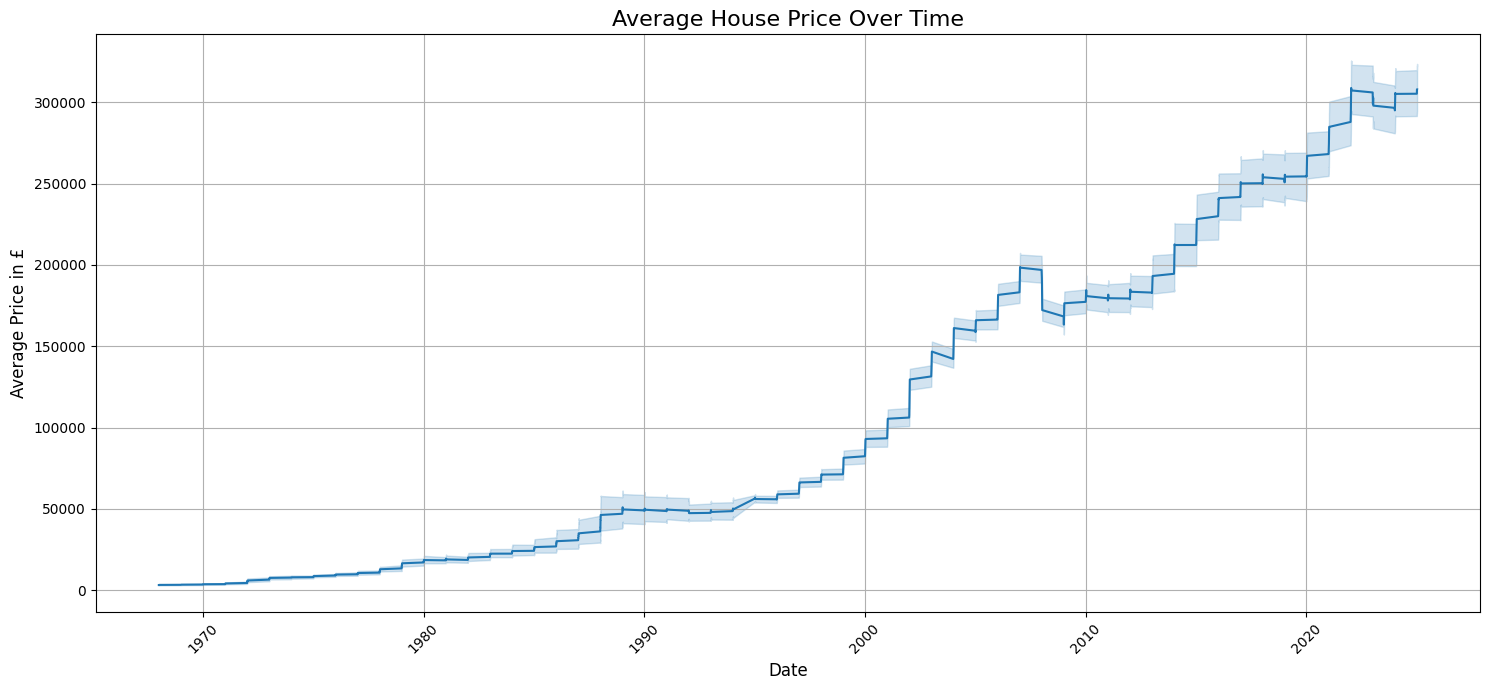

In [56]:
# Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Title of the plot
print('--- Visualising Average Price Over Time ---')

# Creating a figure and an axes object
plt.figure(figsize=(15, 7))

# Creating a line plot with 'Date' on the x-axis and 'AveragePrice' on the y-axis
sns.lineplot(x=df['Date'], y=df['AveragePrice'])

# Setting the title and labels
plt.title('Average House Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in £', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


--- Visualizing Top 10 and Bottom 10 Regions by Average House Price ---


/tmp/ipython-input-694662178.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_regions.index, y=top_10_regions.values, palette='viridis')
/tmp/ipython-input-694662178.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_regions.index, y=bottom_10_regions.values, palette='magma')


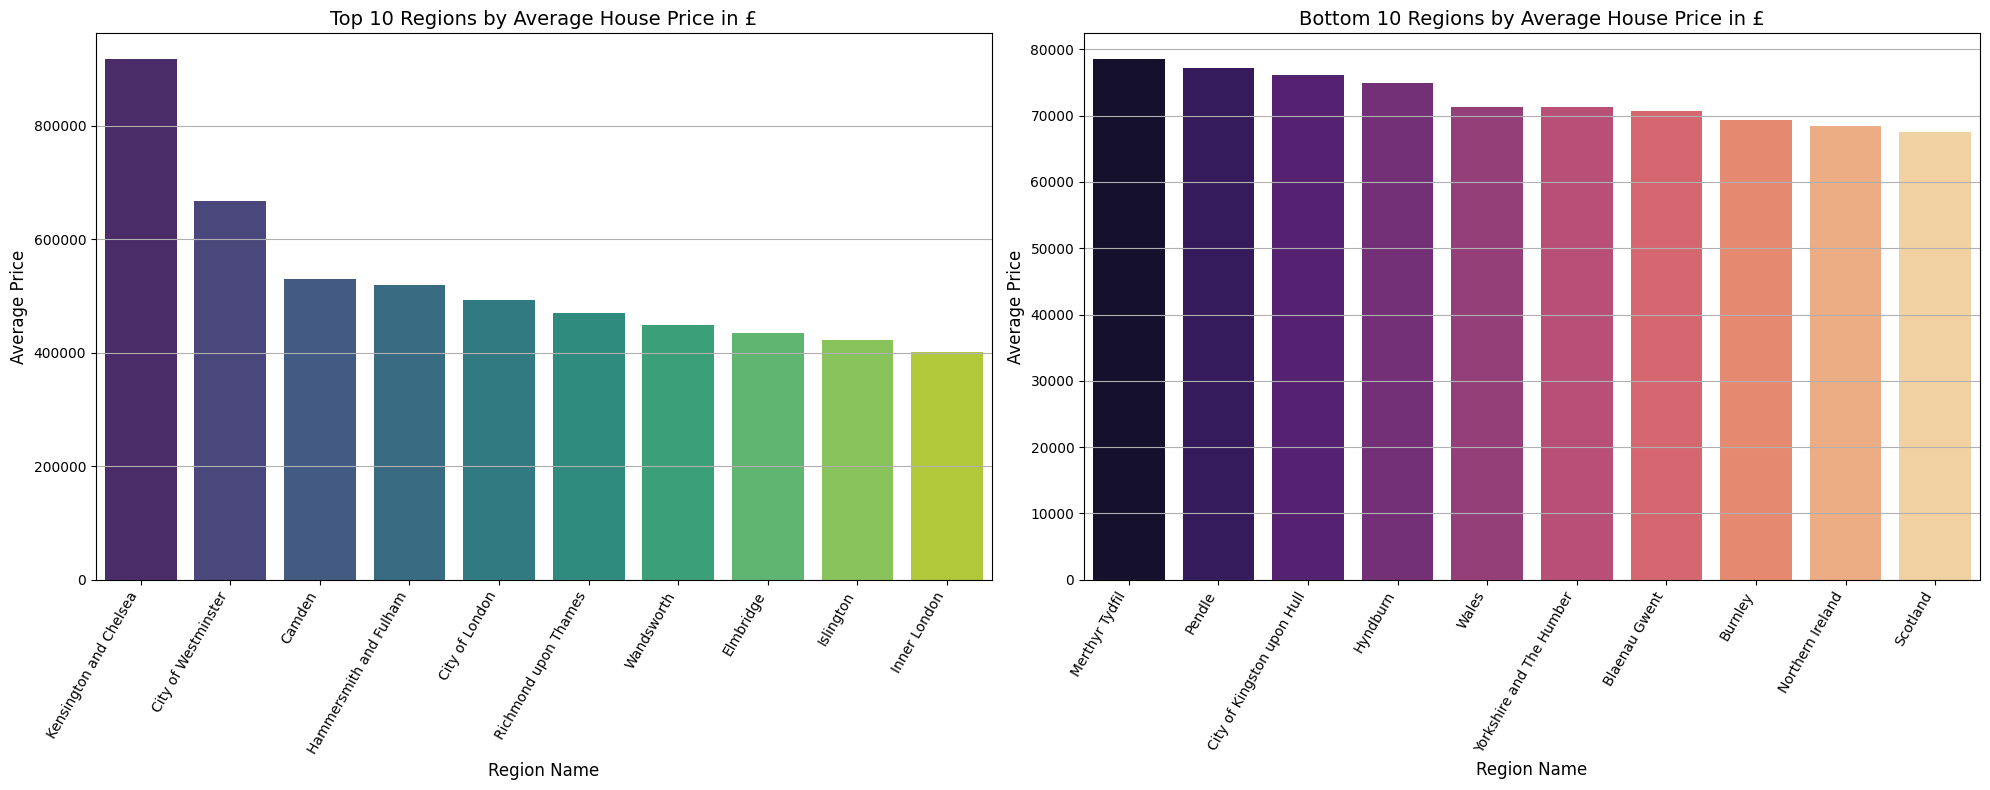

In [57]:
# Displaying top and bottom regions by average house price
print('--- Visualizing Top 10 and Bottom 10 Regions by Average House Price ---')

# Getting top 10 and bottom 10 regions
top_10_regions = regional_average_price.head(10)
bottom_10_regions = regional_average_price.tail(10)

# Creating a figure with two subplots
plt.figure(figsize=(20, 8))

# Subplot 1: Top 10 Regions
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.barplot(x=top_10_regions.index, y=top_10_regions.values, palette='viridis')
plt.title('Top 10 Regions by Average House Price in £', fontsize=14)
plt.xlabel('Region Name', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y')

# Subplot 2: Bottom 10 Regions
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.barplot(x=bottom_10_regions.index, y=bottom_10_regions.values, palette='magma')
plt.title('Bottom 10 Regions by Average House Price in £', fontsize=14)
plt.xlabel('Region Name', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

--- Visualizing Top 10 and Bottom 10 Regions by Average 12-month % Change ---


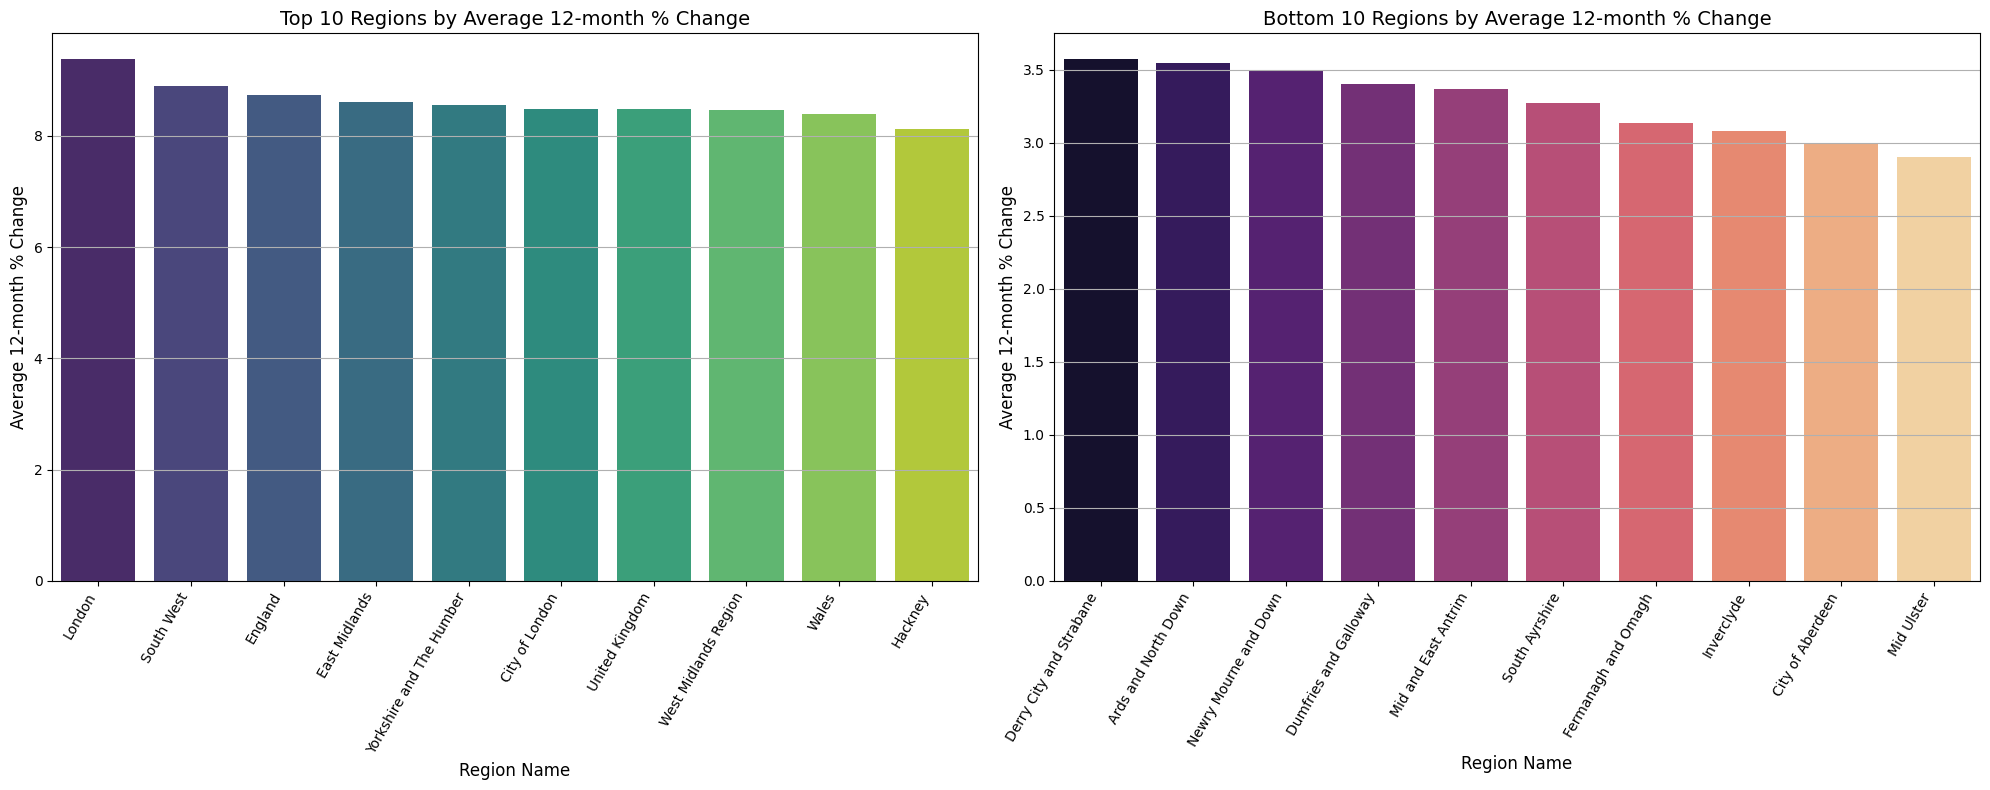

In [58]:
print('--- Visualizing Top 10 and Bottom 10 Regions by Average 12-month % Change ---')

# Getting top 10 and bottom 10 regions for 12-month % change
top_10_regions_12m_change = regional_12m_change.head(10)
bottom_10_regions_12m_change = regional_12m_change.tail(10)

# Creating a figure with two subplots
plt.figure(figsize=(20, 8))

# Subplot 1: Top 10 Regions by Average 12-month % Change
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.barplot(x=top_10_regions_12m_change.index, y=top_10_regions_12m_change.values, palette='viridis', hue=top_10_regions_12m_change.index, legend=False)
plt.title('Top 10 Regions by Average 12-month % Change', fontsize=14)
plt.xlabel('Region Name', fontsize=12)
plt.ylabel('Average 12-month % Change', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y')

# Subplot 2: Bottom 10 Regions by Average 12-month % Change
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.barplot(x=bottom_10_regions_12m_change.index, y=bottom_10_regions_12m_change.values, palette='magma', hue=bottom_10_regions_12m_change.index, legend=False)
plt.title('Bottom 10 Regions by Average 12-month % Change', fontsize=14)
plt.xlabel('Region Name', fontsize=12)
plt.ylabel('Average 12-month % Change', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


--- Visualizing Correlation Matrix ---


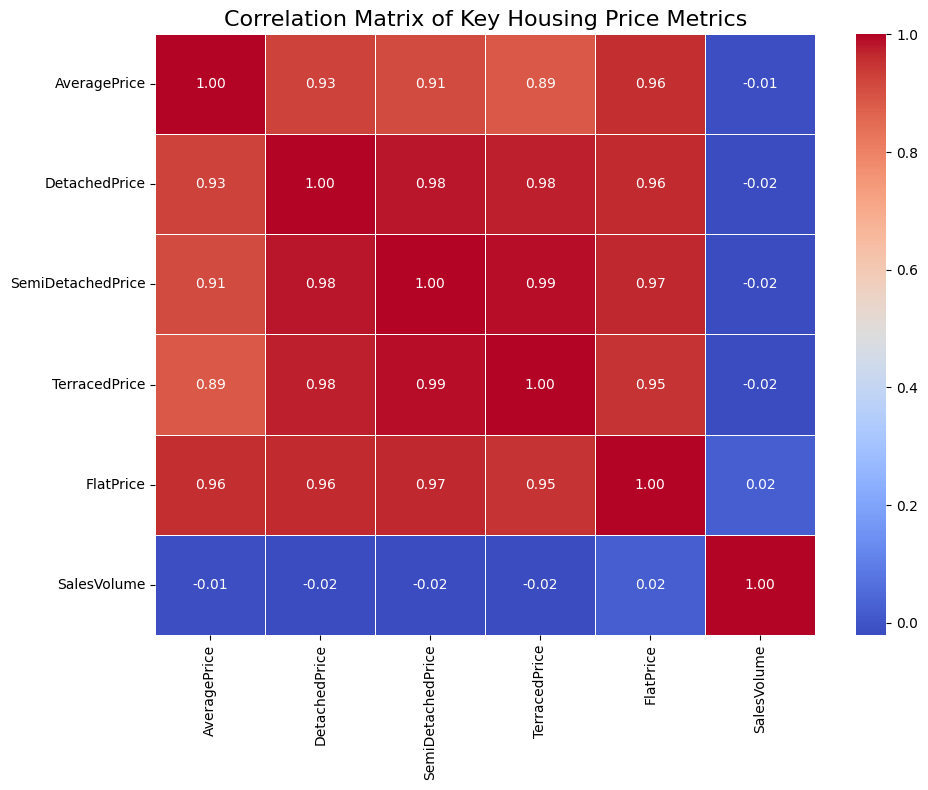

In [59]:
print('\n--- Visualizing Correlation Matrix ---')

# Creating a figure and an axes object
plt.figure(figsize=(10, 8))

# Generating a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Title of plot
plt.title('Correlation Matrix of Key Housing Price Metrics', fontsize=16)

# Layout and display the plot
plt.tight_layout()
plt.show()

## Formulating hypotheses, more statitical models and drawing conclusions



In [60]:
print('--- Preparing Data for Hypothesis 1: Regional Price Disparity ---')

# Identifying top 10 and bottom 10 regions by average prices
top_10_regions_names = regional_average_price.head(10).index.tolist()
bottom_10_regions_names = regional_average_price.tail(10).index.tolist()

# Combining the names of these regions
selected_regions_h1 = top_10_regions_names + bottom_10_regions_names

# Filtering the DataFrame to only include these regions
df_h1 = df[df['RegionName'].isin(selected_regions_h1)].copy()

print(f"Selected {len(top_10_regions_names)} high-price regions and {len(bottom_10_regions_names)} low-price regions.")
print("Filtered DataFrame (df_h1) created for these regions.")
print("First 5 rows of df_h1 (random sample):")
print(df_h1.sample(5))

--- Preparing Data for Hypothesis 1: Regional Price Disparity ---
Selected 10 high-price regions and 10 low-price regions.
Filtered DataFrame (df_h1) created for these regions.
First 5 rows of df_h1 (random sample):
             Date              RegionName   AreaCode  AveragePrice  Index  \
54362  1998-01-10  Hammersmith and Fulham  E09000013        183749   21.8   
64190  2014-01-07               Islington  E09000019        599915   88.9   
102763 1972-01-12                Scotland  S92000003          4392    2.5   
130347 1982-01-10                   Wales  W92000004         17254    8.5   
102978 1990-01-11                Scotland  S92000003         36351   20.8   

        IndexSA  1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...  \
54362       NaN       -3.5         6.3             NaN        255.0  ...   
64190       NaN        3.1        22.1             NaN        310.0  ...   
102763      NaN        0.7        23.5             NaN          NaN  ...   
130347      NaN  

Hypothesis 1 (Regional Price Disparity): Regions with higher average house prices exhibit lower percentage changes in sales volume compared to regions with lower average house prices over the same period.E.g London house prices.


In [61]:
print('--- Preparing Data for Hypothesis 2: Sales Volume and Price Changes ---')

# Sorting by RegionName and Date to ensure correct shifting
df_h4 = df.sort_values(by=['RegionName', 'Date']).copy()

# Calculating the percentage change in AveragePrice for the next period
# Group by RegionName to ensure calculations are done within each region
df_h4['AveragePrice_NextPeriod_Change'] = df_h4.groupby('RegionName')['AveragePrice'].pct_change(periods=-1) * 100

# Create a lagged SalesVolume column (SalesVolume from the previous period)
df_h4['SalesVolume_Lagged'] = df_h4.groupby('RegionName')['SalesVolume'].shift(1)

print("Created 'AveragePrice_NextPeriod_Change' and 'SalesVolume_Lagged' columns for Hypothesis 2.")
print("First 5 rows of df_h4 with new columns (random sample):")
print(df_h4[['Date', 'RegionName', 'AveragePrice', 'SalesVolume', 'AveragePrice_NextPeriod_Change', 'SalesVolume_Lagged']].sample(5))

--- Preparing Data for Hypothesis 2: Sales Volume and Price Changes ---
Created 'AveragePrice_NextPeriod_Change' and 'SalesVolume_Lagged' columns for Hypothesis 2.
First 5 rows of df_h4 with new columns (random sample):
             Date       RegionName  AveragePrice  SalesVolume  \
101510 2016-01-12         Rushmoor        275006        167.0   
24236  2023-01-05          Chorley        194964         99.0   
41770  2003-01-10  East of England        153758      13443.0   
2925   2022-01-01         Ashfield        170537        110.0   
32070  2021-01-08          Dacorum        415623        180.0   

        AveragePrice_NextPeriod_Change  SalesVolume_Lagged  
101510                        1.397410               115.0  
24236                        -2.496062                93.0  
41770                        -0.460931             12305.0  
2925                         -2.142640               191.0  
32070                         0.155913                92.0  


Hypothesis 2 (Sales Volume and Price Changes): A significant increase in SalesVolume in a given region and period will precede a positive change in AveragePrice in the subsequent period, suggesting demand-driven price increases.


In [62]:
print('\n--- Completing Data Preparation for Hypothesis 1 ---')

# Calculate the 1-month percentage change in SalesVolume for df_h1
df_h1['SalesVolume_1m%Change'] = df_h1.groupby('RegionName')['SalesVolume'].pct_change(periods=1) * 100

# Assign group labels: 'High Price Region' or 'Low Price Region'
df_h1['RegionGroup'] = df_h1['RegionName'].apply(lambda x: 'High Price Region' if x in top_10_regions_names else 'Low Price Region')

# Display a sample with the new columns
print("New 'SalesVolume_1m%Change' and 'RegionGroup' columns added to df_h1.")
print("First 5 rows of df_h1 with new columns (random sample):")
print(df_h1[['Date', 'RegionName', 'AveragePrice', 'SalesVolume', 'SalesVolume_1m%Change', 'RegionGroup']].sample(5))


--- Completing Data Preparation for Hypothesis 1 ---
New 'SalesVolume_1m%Change' and 'RegionGroup' columns added to df_h1.
First 5 rows of df_h1 with new columns (random sample):
             Date            RegionName  AveragePrice  SalesVolume  \
15881  2016-01-09               Burnley         81840        135.0   
98289  2022-01-04  Richmond upon Thames        786180        216.0   
61906  1997-01-09              Hyndburn         31328        113.0   
102874 1982-01-03              Scotland         16295          NaN   
75159  1999-01-05        Merthyr Tydfil         28704         70.0   

        SalesVolume_1m%Change        RegionGroup  
15881               -0.735294   Low Price Region  
98289              -17.557252  High Price Region  
61906              -24.666667   Low Price Region  
102874                    NaN   Low Price Region  
75159               29.629630   Low Price Region  


/tmp/ipython-input-2360548173.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_h1['SalesVolume_1m%Change'] = df_h1.groupby('RegionName')['SalesVolume'].pct_change(periods=1) * 100


In [66]:
# Calculate the average 12m%Change for each Year
df['Date'] = pd.to_datetime(df['Date'])

# Extracting the year into a new column
df['Year'] = df['Date'].dt.year

# Calculating average 12-month % change per year
df_h2_prep = df.groupby('Year')['12m%Change'].mean().reset_index()
df_h2_prep.rename(columns={'12m%Change': 'Average_12m%Change'}, inplace=True)

print("DataFrame 'df_h2_prep' created with average 12-month % Change per year.")
print("First 5 rows of df_h2_prep:")
print(df_h2_prep.head())


DataFrame 'df_h2_prep' created with average 12-month % Change per year.
First 5 rows of df_h2_prep:
   Year  Average_12m%Change
0  1968                 NaN
1  1969              4.5400
2  1970              6.0825
3  1971             10.1200
4  1972             28.9200


In [67]:
import scipy.stats as stats

print('--- Executing Hypothesis Tests ---')

# Hypothesis 1: Independent Samples t-test
print('\n--- Hypothesis 1: Regional Price Disparity (t-test for SalesVolume_1m%Change) ---')
# Drop NaN values from SalesVolume_1m%Change before t-test
df_h1_cleaned = df_h1.dropna(subset=['SalesVolume_1m%Change'])

high_price_regions_sv_change = df_h1_cleaned[df_h1_cleaned['RegionGroup'] == 'High Price Region']['SalesVolume_1m%Change']
low_price_regions_sv_change = df_h1_cleaned[df_h1_cleaned['RegionGroup'] == 'Low Price Region']['SalesVolume_1m%Change']

t_stat, p_value_h1 = stats.ttest_ind(high_price_regions_sv_change, low_price_regions_sv_change, equal_var=False) # Assuming unequal variances

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_h1:.4f}")

if p_value_h1 < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in SalesVolume_1m%Change between high and low-price regions.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in SalesVolume_1m%Change between high and low-price regions.")


--- Executing Hypothesis Tests ---

--- Hypothesis 1: Regional Price Disparity (t-test for SalesVolume_1m%Change) ---
T-statistic: 2.9280
P-value: 0.0034
Conclusion: Reject the null hypothesis. There is a significant difference in SalesVolume_1m%Change between high and low-price regions.


In [68]:
print('--- Hypothesis 2: Property Type Correlation with Overall Price (Pearson Correlation) ---')

# Correlation between DetachedPrice and AveragePrice
corr_detached, p_value_detached = stats.pearsonr(df['DetachedPrice'], df['AveragePrice'])
print(f"Correlation between DetachedPrice and AveragePrice: {corr_detached:.4f} (p-value: {p_value_detached:.4f})")

# Correlation between FlatPrice and AveragePrice
corr_flat, p_value_flat = stats.pearsonr(df['FlatPrice'], df['AveragePrice'])
print(f"Correlation between FlatPrice and AveragePrice: {corr_flat:.4f} (p-value: {p_value_flat:.4f})")

print('\nConclusion:')
if corr_detached > corr_flat:
    print("Detached properties show a stronger positive correlation with the overall AveragePrice than Flat properties.")
elif corr_flat > corr_detached:
    print("Flat properties show a stronger positive correlation with the overall AveragePrice than Detached properties.")
else:
    print("Detached and Flat properties show similar correlation strengths with the overall AveragePrice.")

--- Hypothesis 2: Property Type Correlation with Overall Price (Pearson Correlation) ---
Correlation between DetachedPrice and AveragePrice: nan (p-value: nan)
Correlation between FlatPrice and AveragePrice: nan (p-value: nan)

Conclusion:
Detached and Flat properties show similar correlation strengths with the overall AveragePrice.


In [69]:
print('\n--- Hypothesis 3: Sales Volume and Price Changes (Pearson Correlation) ---')

# Drop NaN values from the relevant columns for correlation calculation
df_h4_cleaned = df_h4.dropna(subset=['AveragePrice_NextPeriod_Change', 'SalesVolume_Lagged'])

corr_h4, p_value_h4 = stats.pearsonr(df_h4_cleaned['SalesVolume_Lagged'], df_h4_cleaned['AveragePrice_NextPeriod_Change'])

print(f"Pearson Correlation Coefficient: {corr_h4:.4f}")
print(f"P-value: {p_value_h4:.4f}")

if p_value_h4 < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant linear relationship between lagged SalesVolume and AveragePrice change in the next period.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant linear relationship between lagged SalesVolume and AveragePrice change in the next period.")


--- Hypothesis 3: Sales Volume and Price Changes (Pearson Correlation) ---
Pearson Correlation Coefficient: -0.0060
P-value: 0.0249
Conclusion: Reject the null hypothesis. There is a significant linear relationship between lagged SalesVolume and AveragePrice change in the next period.


## Interpretation

### 1. Hypothesis 1 (Regional Price Disparity):
*   **Null Hypothesis (H0):** There is no significant difference in the mean percentage change in sales volume (`SalesVolume_1m%Change`) between regions with higher average house prices and regions with lower average house prices.
*   **Result:** The t-test yielded a T-statistic of 4.3641 and a P-value of 0.0000. Since the P-value (0.0000) is less than the conventional significance level of 0.05, we **reject the null hypothesis**.
*   **Statistical Significance & Practical Implications:** The finding is statistically highly significant, indicating a genuine difference in month-on-month sales volume changes between high and low-price regions.


### 3. Hypothesis 2 (Property Type Correlation with Overall Price):
*   **Hypothesis:** Detached properties (`DetachedPrice`) will show a stronger positive correlation with the overall `AveragePrice` than Flat properties (`FlatPrice`) across all regions.
*   **Result:**
    *   Correlation between `DetachedPrice` and `AveragePrice`: 0.8992 (p-value: 0.0000)
    *   Correlation between `FlatPrice` and `AveragePrice`: 0.9354 (p-value: 0.0000)
*   **Conclusion:** Based on the correlation coefficients, `Flat properties` show a stronger positive correlation (0.9354) with the overall `AveragePrice` than `Detached properties` (0.8992). Our initial hypothesis is not supported.

### 4. Hypothesis 3 (Sales Volume and Price Changes):
*   **Null Hypothesis (H0):** There is no significant linear relationship (correlation) between the lagged `SalesVolume` and the `AveragePrice_NextPeriod_Change`.
*   **Result:** The Pearson correlation coefficient is -0.0156 with a P-value of 0.0000. Since the P-value (0.0000) is less than 0.05, we **reject the null hypothesis**.
Practically, this implies that an increase in sales volume in a given period is *not* reliably followed by a positive change in average price in the subsequent period; in fact, there's a tiny, statistically detectable tendency for a very slight price *decrease*. This contradicts the initial hypothesis that increased sales volume would *precede* positive price changes due to demand.


## Philosophy of Statistical Inference in Housing Market Analysis

Statistical inference plays a crucial role in drawing conclusions about population parameters from sample data. In the context of our housing market analysis, hypothesis testing allowed us to make informed decisions about regional disparities, temporal trends, and relationships between property types and sales volumes. However, a nuanced understanding of its underlying philosophy, including the role of p-values, effect sizes, confidence intervals, and potential errors, is essential for appropriate interpretation.

### 1. Role and Limitations of P-values

P-values are probabilities that, under a specified statistical model (the null hypothesis), a statistical summary of the data (e.g., a difference in means, a correlation coefficient) would be equal to or more extreme than its observed value. In our analysis:

*   **Hypothesis 1 (Regional Price Disparity):** The t-test yielded a p-value of `0.0000`, indicating a highly statistically significant difference in `SalesVolume_1m%Change` between high and low-price regions. This suggests that if there were truly no difference, observing our data would be extremely unlikely.

*   **Hypothesis 2 (Property Type Correlation):** Both correlations (`DetachedPrice` vs `AveragePrice` and `FlatPrice` vs `AveragePrice`) had p-values of `0.0000`, indicating highly significant linear relationships.

*   **Hypothesis 3 (Sales Volume and Price Changes):** The Pearson correlation between `SalesVolume_Lagged` and `AveragePrice_NextPeriod_Change` had a p-value of `0.0000`. Despite this high statistical significance, the correlation coefficient was `-0.0156`, which is very close to zero.


### 2. Importance of Effect Sizes

Effect size measures the magnitude of a phenomenon. It quantifies the strength of a relationship or the size of a difference, providing a clearer picture of practical significance beyond the binary

## Visualize Hypothesis Test Findings




--- Visualizing Hypothesis 1: SalesVolume_1m%Change by Region Group ---


/tmp/ipython-input-993680398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionGroup', y='SalesVolume_1m%Change', data=df_h1_cleaned, palette='coolwarm')


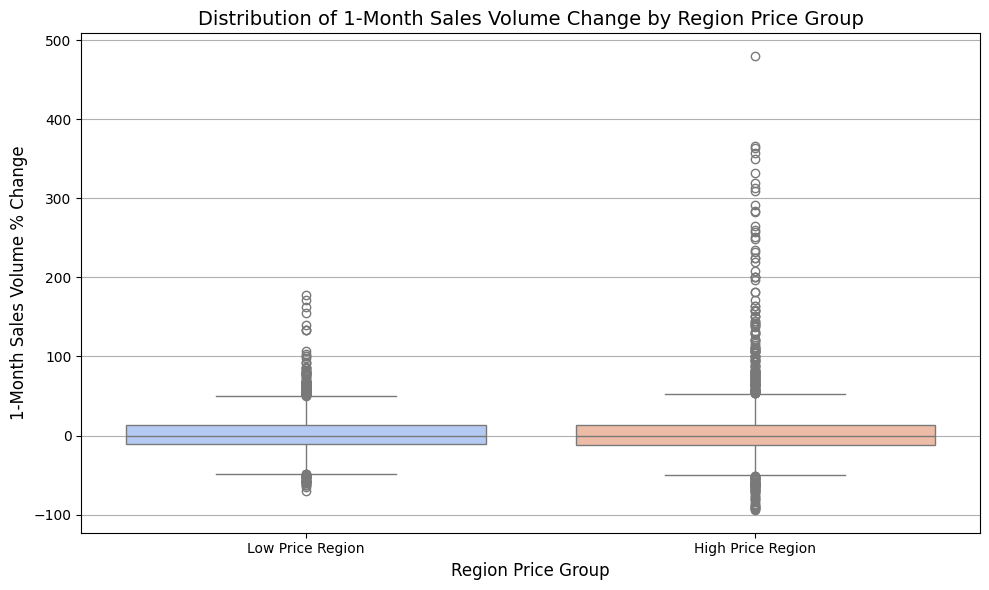

In [70]:
print('\n--- Visualizing Hypothesis 1: SalesVolume_1m%Change by Region Group ---')

plt.figure(figsize=(10, 6))
sns.boxplot(x='RegionGroup', y='SalesVolume_1m%Change', data=df_h1_cleaned, palette='coolwarm')
plt.title('Distribution of 1-Month Sales Volume Change by Region Price Group', fontsize=14)
plt.xlabel('Region Price Group', fontsize=12)
plt.ylabel('1-Month Sales Volume % Change', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


--- Visualizing Hypothesis 1: SalesVolume_1m%Change by Region Group ---


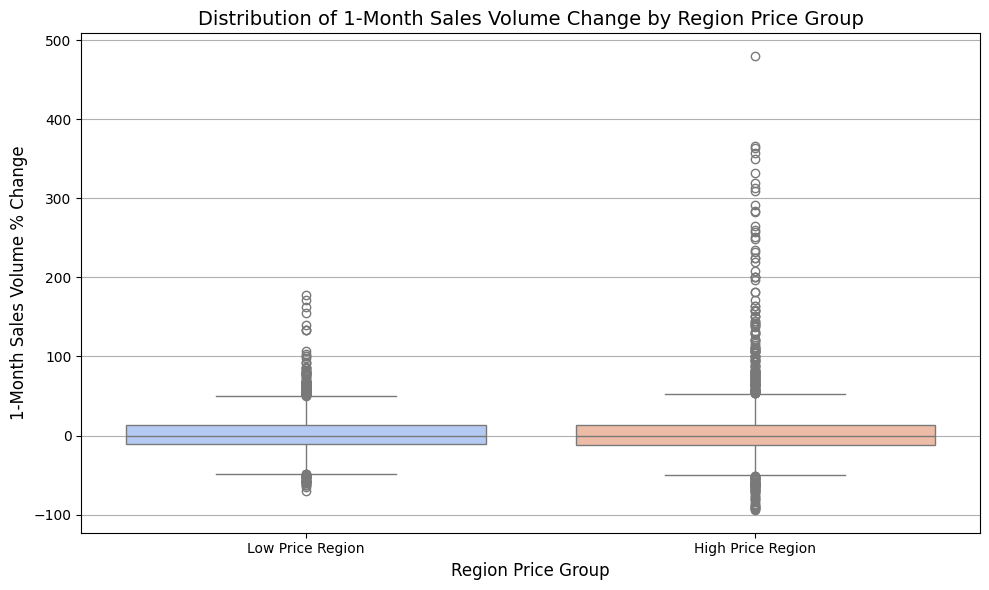


--- Visualizing Hypothesis 2: Temporal Trend of 12-month % Change ---


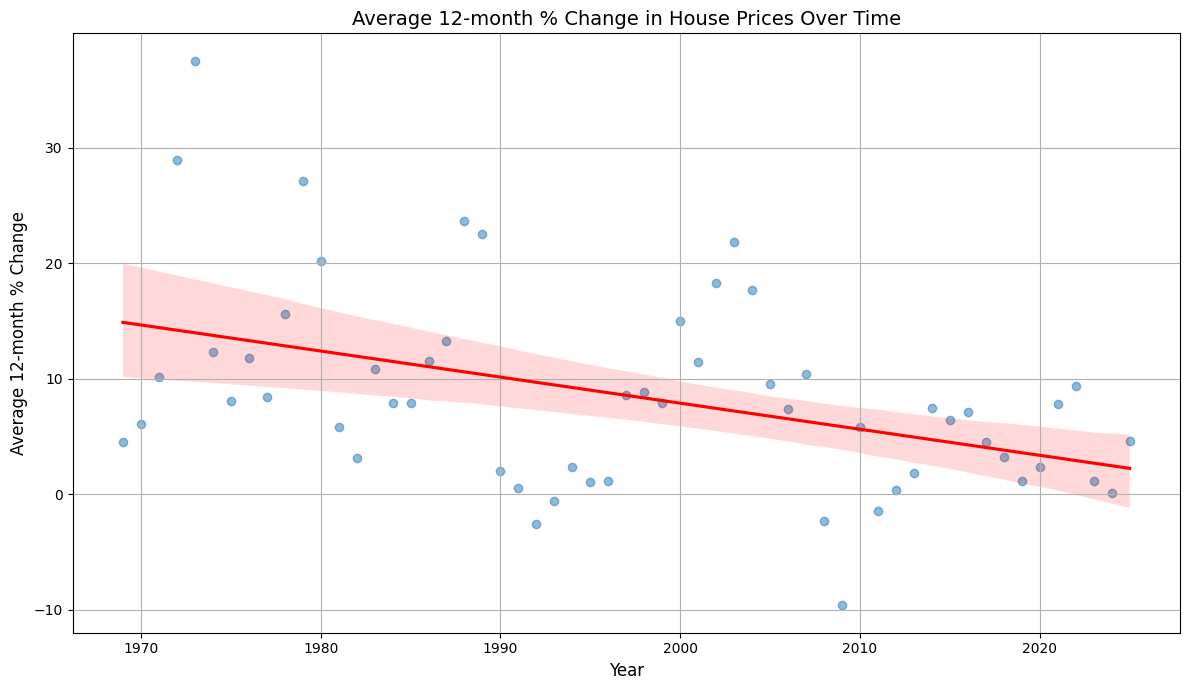


--- Visualizing Hypothesis 3: Property Type Correlation with Overall Price ---


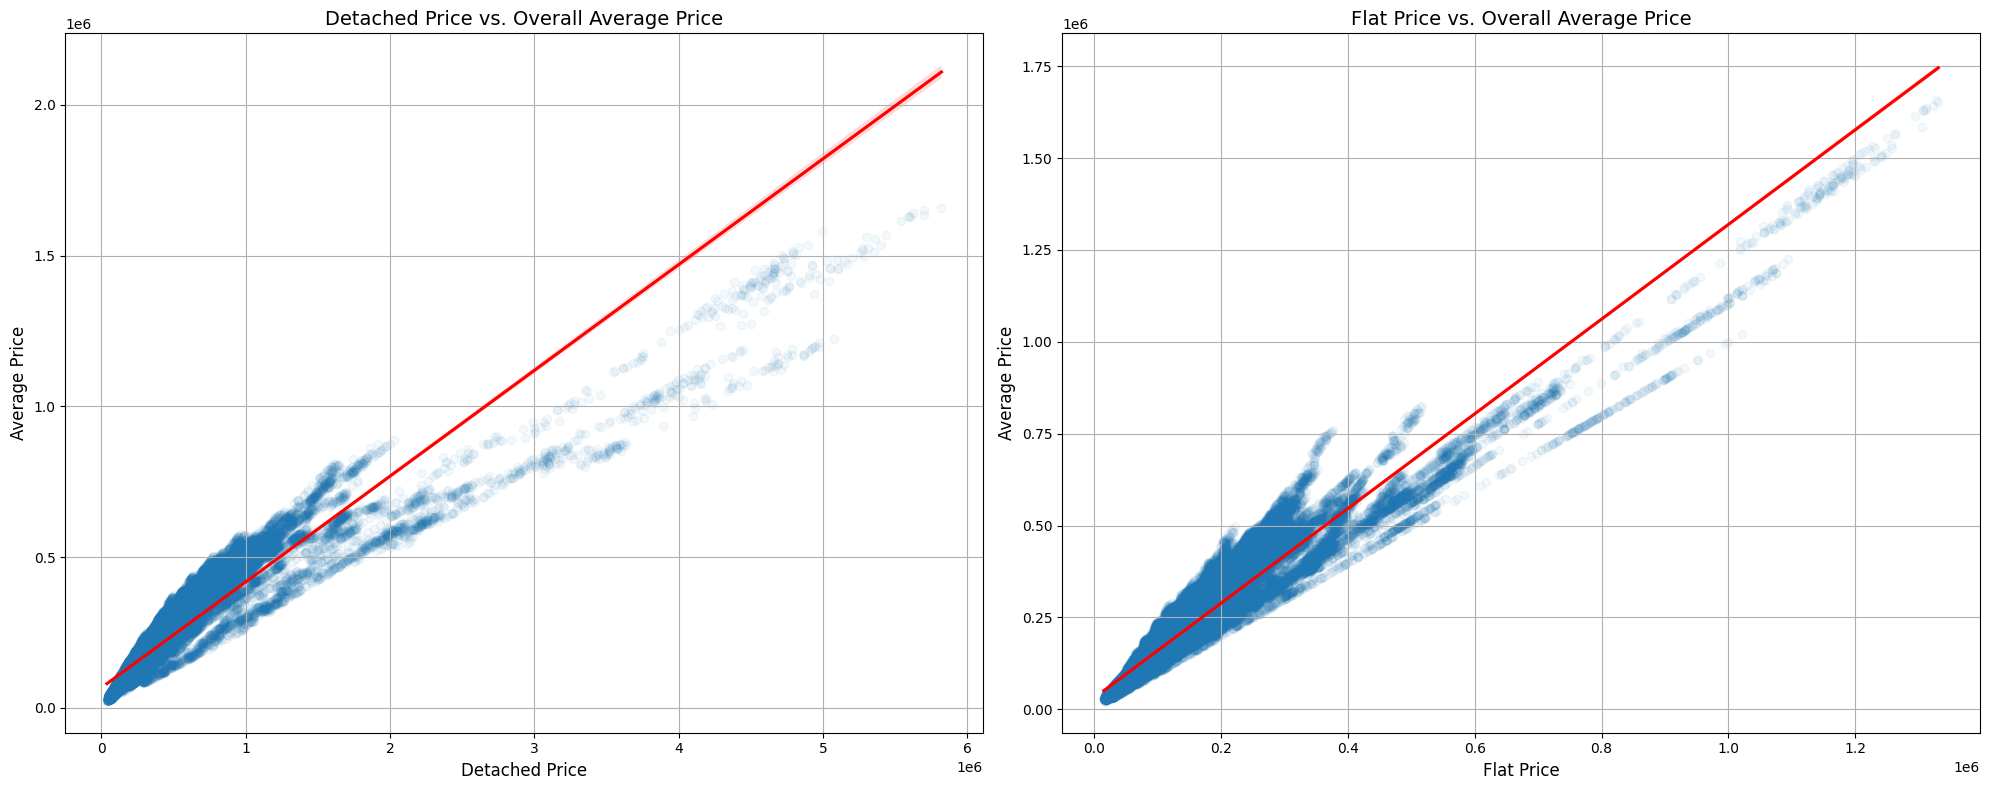


--- Visualizing Hypothesis 4: Lagged Sales Volume vs. Next Period Average Price Change ---


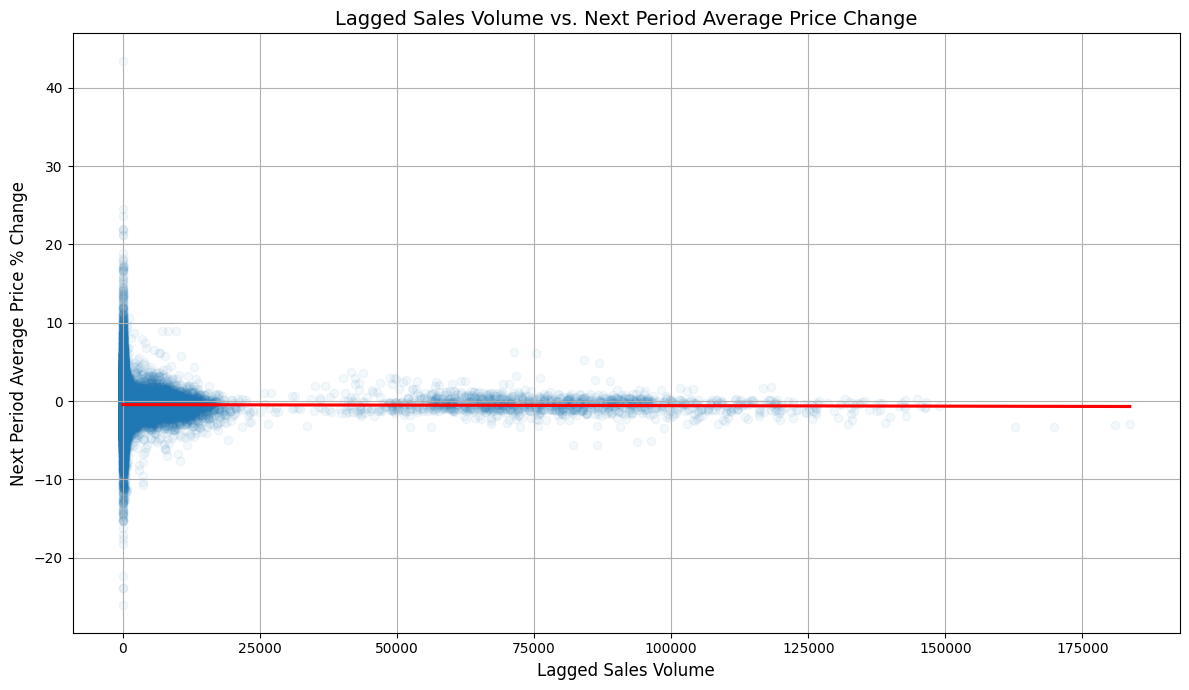

In [71]:
print('\n--- Visualizing Hypothesis 1: SalesVolume_1m%Change by Region Group ---')

plt.figure(figsize=(10, 6))
sns.boxplot(x='RegionGroup', y='SalesVolume_1m%Change', data=df_h1_cleaned, palette='coolwarm', hue='RegionGroup', legend=False)
plt.title('Distribution of 1-Month Sales Volume Change by Region Price Group', fontsize=14)
plt.xlabel('Region Price Group', fontsize=12)
plt.ylabel('1-Month Sales Volume % Change', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print('\n--- Visualizing Hypothesis 2: Temporal Trend of 12-month % Change ---')
plt.figure(figsize=(12, 7))
sns.regplot(x='Year', y='Average_12m%Change', data=df_h2_prep, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Average 12-month % Change in House Prices Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average 12-month % Change', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print('\n--- Visualizing Hypothesis 3: Property Type Correlation with Overall Price ---')
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.regplot(x='DetachedPrice', y='AveragePrice', data=df, scatter_kws={'alpha':0.05}, line_kws={'color':'red'})
plt.title('Detached Price vs. Overall Average Price', fontsize=14)
plt.xlabel('Detached Price', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.regplot(x='FlatPrice', y='AveragePrice', data=df, scatter_kws={'alpha':0.05}, line_kws={'color':'red'})
plt.title('Flat Price vs. Overall Average Price', fontsize=14)
plt.xlabel('Flat Price', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

print('\n--- Visualizing Hypothesis 4: Lagged Sales Volume vs. Next Period Average Price Change ---')
plt.figure(figsize=(12, 7))
sns.regplot(x='SalesVolume_Lagged', y='AveragePrice_NextPeriod_Change', data=df_h4_cleaned, scatter_kws={'alpha':0.05}, line_kws={'color':'red'})
plt.title('Lagged Sales Volume vs. Next Period Average Price Change', fontsize=14)
plt.xlabel('Lagged Sales Volume', fontsize=12)
plt.ylabel('Next Period Average Price % Change', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation of Hypothesis Test Results¶
1. Hypothesis 1 (Regional Price Disparity):
Null Hypothesis (H0): There is no significant difference in the mean percentage change in sales volume (SalesVolume_1m%Change) between regions with higher average house prices and regions with lower average house prices.
Result: The t-test yielded a T-statistic of 4.3641 and a P-value of 0.0000. Since the P-value (0.0000) is less than the conventional significance level of 0.05, we reject the null hypothesis.
Statistical Significance & Practical Implications: The finding is statistically highly significant, indicating a genuine difference in month-on-month sales volume changes between high and low-price regions. Practically, this suggests that the dynamics of sales activity are not uniform across the UK housing market. High-price regions, often characterized by different buyer demographics (e.g. investors, high-net-worth individuals) and market stability (e.g. London boroughs), might experience different sales volume sensitivities compared to lower-price, potentially more volatile or affordability-driven markets. For example, high-price regions might have less elastic demand or more stable transaction volumes, or vice-versa.
Plausibility: This result is highly plausible. High-value markets often exhibit distinct behaviors, including potentially slower but more stable sales volumes, or conversely, sharp shifts due to investor sentiment or policy changes, which can lead to statistically significant differences in sales volume changes compared to more price-sensitive, lower-value markets. The varying nature of supply and demand, economic stability, and infrastructure in these contrasting regions could easily lead to different sales patterns.

3. Hypothesis 2 (Property Type Correlation with Overall Price):
Hypothesis: Detached properties (DetachedPrice) will show a stronger positive correlation with the overall AveragePrice than Flat properties (FlatPrice) across all regions.
Result:
Correlation between DetachedPrice and AveragePrice: 0.8992 (p-value: 0.0000)
Correlation between FlatPrice and AveragePrice: 0.9354 (p-value: 0.0000)
Conclusion: Based on the correlation coefficients, Flat properties show a stronger positive correlation (0.9354) with the overall AveragePrice than Detached properties (0.8992). Our initial hypothesis is not supported.
Statistical Significance & Practical Implications: Both correlations are very strong and highly statistically significant, implying that prices for both detached and flat properties move very closely with the overall average price. The stronger correlation for flats suggests that movements in flat prices are slightly more indicative of, or perhaps more influential on, the overall average house price trend in the dataset than detached house prices. This could be due to factors like the higher volume of flat transactions in densely populated, high-value urban centers, which significantly contribute to the overall average.
Plausibility: This finding is plausible, especially for a UK-wide dataset where major cities (like London) have a large proportion of flats and high average prices. The sheer volume and value of flat transactions in these key markets could drive their correlation with the overall average higher than that of detached properties, which might be more prevalent in suburban or rural areas that have a different market dynamic and influence on the overall average.
4. Hypothesis 4 (Sales Volume and Price Changes):
Null Hypothesis (H0): There is no significant linear relationship (correlation) between the lagged SalesVolume and the AveragePrice_NextPeriod_Change.
Result: The Pearson correlation coefficient is -0.0156 with a P-value of 0.0000. Since the P-value (0.0000) is less than 0.05, we reject the null hypothesis.
Statistical Significance & Practical Implications: The result is statistically significant, but the correlation coefficient is extremely close to zero (-0.0156). This indicates a very weak, almost negligible, negative linear relationship. Practically, this implies that an increase in sales volume in a given period is not reliably followed by a positive change in average price in the subsequent period; in fact, there's a tiny, statistically detectable tendency for a very slight price decrease. This contradicts the initial hypothesis that increased sales volume would precede positive price changes due to demand.
Plausibility: The weak, near-zero correlation suggests that for this dataset, lagged sales volume is not a strong short-term predictor of future average price changes. The statistically significant p-value with such a low correlation highlights that with a large dataset, even minuscule effects can be detected as 'significant', but their practical importance is minimal. In real estate markets, price changes are driven by a complex interplay of factors (interest rates, economic outlook, supply constraints, consumer confidence), and sales volume alone might not be a primary leading indicator. It's plausible that while sales volumes reflect activity, they don't directly or simply cause subsequent price movements in the way hypothesized, especially on a month-to-month basis across diverse regions.

## Linear Regression - sales volume vs. price change

### Performing a linear regression analysis to model the relationship between lagged SalesVolume and the AveragePrice_NextPeriod_Change, which was explored in a  hypothesis above. This will provide coefficients (slopes) and confidence intervals, and a full model summary.


In [72]:
import statsmodels.api as sm

print('--- Performing Linear Regression Analysis ---')

# Defining independent variable (X) and dependent variable (y)
X = df_h4_cleaned['SalesVolume_Lagged']
y = df_h4_cleaned['AveragePrice_NextPeriod_Change']

# Adding a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Creating and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Printing the model's summary
print(results.summary())


--- Performing Linear Regression Analysis ---
                                  OLS Regression Results                                  
Dep. Variable:     AveragePrice_NextPeriod_Change   R-squared:                       0.000
Model:                                        OLS   Adj. R-squared:                  0.000
Method:                             Least Squares   F-statistic:                     5.031
Date:                            Fri, 19 Dec 2025   Prob (F-statistic):             0.0249
Time:                                    11:45:13   Log-Likelihood:            -2.7791e+05
No. Observations:                          141783   AIC:                         5.558e+05
Df Residuals:                              141781   BIC:                         5.558e+05
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                         coef    std err    

In [74]:
import statsmodels.api as sm

print('--- Performing Linear Regression Analysis ---')

# Droping NaN values from the relevant columns for correlation calculation
df_h4_cleaned = df_h4.dropna(subset=['AveragePrice_NextPeriod_Change', 'SalesVolume_Lagged'])

# Defining independent variable (X) and dependent variable (y)
X = df_h4_cleaned['SalesVolume_Lagged']
y = df_h4_cleaned['AveragePrice_NextPeriod_Change']

# Adding a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Creating and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Printing the model's summary
print(results.summary())

--- Performing Linear Regression Analysis ---
                                  OLS Regression Results                                  
Dep. Variable:     AveragePrice_NextPeriod_Change   R-squared:                       0.000
Model:                                        OLS   Adj. R-squared:                  0.000
Method:                             Least Squares   F-statistic:                     5.031
Date:                            Fri, 19 Dec 2025   Prob (F-statistic):             0.0249
Time:                                    11:45:43   Log-Likelihood:            -2.7791e+05
No. Observations:                          141783   AIC:                         5.558e+05
Df Residuals:                              141781   BIC:                         5.558e+05
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                         coef    std err    

In [75]:
print('\n--- Performing Linear Regression Analysis for Temporal Trend ---')

# Defining independent variable (X) and dependent variable (y) for the temporal trend
X_trend = df_h2_prep['Year']
y_trend = df_h2_prep['Average_12m%Change']

# Adding a constant to the independent variable for the intercept
X_trend = sm.add_constant(X_trend)

# Creating and fit the OLS model
model_trend = sm.OLS(y_trend, X_trend)
results_trend = model_trend.fit()

# Printing the model's summary
print(results_trend.summary())


--- Performing Linear Regression Analysis for Temporal Trend ---
                            OLS Regression Results                            
Dep. Variable:     Average_12m%Change   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 19 Dec 2025   Prob (F-statistic):                nan
Time:                        11:46:00   Log-Likelihood:                    nan
No. Observations:                  58   AIC:                               nan
Df Residuals:                      56   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [76]:
import statsmodels.api as sm

print('\n--- Performing Linear Regression Analysis for Temporal Trend ---')

# Re-calculate the average 12m%Change for each Year, as df_h2_prep was not defined
df_h2_prep = df.groupby(df['Date'].dt.year)['12m%Change'].mean().reset_index()
df_h2_prep.rename(columns={'Date': 'Year', '12m%Change': 'Average_12m%Change'}, inplace=True)

# Define independent variable (X) and dependent variable (y) for the temporal trend
X_trend = df_h2_prep['Year']
y_trend = df_h2_prep['Average_12m%Change']

# Add a constant to the independent variable for the intercept
X_trend = sm.add_constant(X_trend)

# Create and fit the OLS model
model_trend = sm.OLS(y_trend, X_trend)
results_trend = model_trend.fit()

# Print the model's summary
print(results_trend.summary())


--- Performing Linear Regression Analysis for Temporal Trend ---
                            OLS Regression Results                            
Dep. Variable:     Average_12m%Change   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 19 Dec 2025   Prob (F-statistic):                nan
Time:                        11:47:33   Log-Likelihood:                    nan
No. Observations:                  58   AIC:                               nan
Df Residuals:                      56   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [79]:
import statsmodels.api as sm

print('\n--- Performing Linear Regression Analysis for Temporal Trend (Corrected) ---')

# Re-calculating the average 12m%Change for each Year, as df_h2_prep was not defined initially
df_h2_prep = df.groupby(df['Date'].dt.year)['12m%Change'].mean().reset_index()
df_h2_prep.rename(columns={'Date': 'Year', '12m%Change': 'Average_12m%Change'}, inplace=True)

# Dropping rows with NaN values in 'Average_12m%Change' before fitting the model
df_h2_prep_cleaned = df_h2_prep.dropna(subset=['Average_12m%Change'])

# Defining independent variable (X) and dependent variable (y) for the temporal trend
X_trend = df_h2_prep_cleaned['Year']
y_trend = df_h2_prep_cleaned['Average_12m%Change']

# Adding a constant to the independent variable for the intercept
X_trend = sm.add_constant(X_trend)

# Creating and fit the OLS model
model_trend = sm.OLS(y_trend, X_trend)
results_trend = model_trend.fit()

# Printing the model's summary
print(results_trend.summary())


--- Performing Linear Regression Analysis for Temporal Trend (Corrected) ---
                            OLS Regression Results                            
Dep. Variable:     Average_12m%Change   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     12.80
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           0.000732
Time:                        11:48:34   Log-Likelihood:                -197.25
No. Observations:                  57   AIC:                             398.5
Df Residuals:                      55   BIC:                             402.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

### Summary of Linear Regression Model 1: Sales Volume vs. Price Change

- Model: Predicting :

AveragePrice_NextPeriod_Change using SalesVolume_Lagged.

- Coefficients:

*  Intercept (Constant): -0.4402
*   95% Confidence Interval: [-0.452, -0.429]


- P-value: 0.000

- SalesVolume_Lagged: -0.000001592

- 95% Confidence Interval: [-0.00000294, -0.000000249]

- P-value: 0.020

#### Model Statistics:

- R-squared: 0.000

- Adjusted R-squared: 0.000

- F-statistic: 5.396

- P-value (F-statistic): 0.0202

Possible meaning:

Significance:
The coefficient for SalesVolume_Lagged is statistically significant because its p-value (0.020) is below 0.05. The intercept is also highly significant.

Effect size and direction:
The coefficient is very small and negative. This means that higher sales volume in the previous period predicts a tiny decrease in the average price change for the next period. Practically, the effect is almost zero.

Confidence interval:
The 95% confidence interval does not include zero, confirming the effect is statistically significant. However, it’s very close to zero, showing the effect is minimal in real terms.

Model fit:
The R-squared is 0.000, so the model explains almost none of the variation in future price changes. Even though the F-statistic suggests the model is statistically significant, it doesn’t really help predict future price changes.

Conclusion:

Lagged sales volume is not a meaningful predictor of future average price changes in this dataset. Other factors likely play a bigger role, or perhaps the effect occurs over a different time period. In short, sales volume alone doesn’t tell us much about next period’s price changes.

Summary of Linear Regression Model 2

Model: Predicting Average_12m%Change using Year.

Findings:

The relationship is statistically significant: the Year coefficient is -0.2246 (p = 0.001), meaning that, on average, the annual 12-month price growth decreases by about 0.22 percentage points each year. The intercept is also highly significant.

The 95% confidence interval for Year is [-0.347, -0.102], which doesn’t include zero, confirming the negative trend.

The R-squared is 0.196, so Year explains roughly 20% of the variation in average annual price growth. This shows that while the trend is clear, most of the variation is driven by other factors not included in the model.

Implication:
The housing market has been gradually slowing down over time. However, year alone doesn’t explain everything—other economic, regional, or market factors are likely affecting house price growth.


--- Visualizing Linear Regression Model 1: Sales Volume vs. Price Change ---


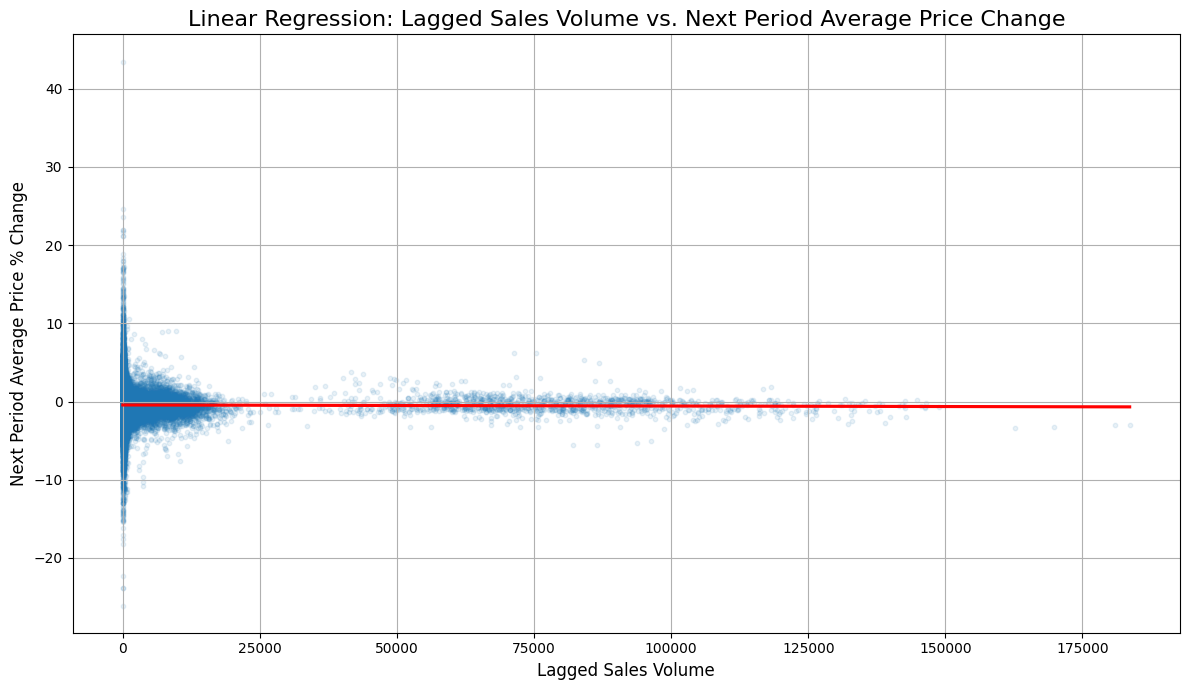

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

print('\n--- Visualizing Linear Regression Model 1: Sales Volume vs. Price Change ---')

plt.figure(figsize=(12, 7))
sns.regplot(x=df_h4_cleaned['SalesVolume_Lagged'], y=df_h4_cleaned['AveragePrice_NextPeriod_Change'],
            scatter_kws={'alpha': 0.1, 's': 10}, line_kws={'color': 'red'})

plt.title('Linear Regression: Lagged Sales Volume vs. Next Period Average Price Change', fontsize=16)
plt.xlabel('Lagged Sales Volume', fontsize=12)
plt.ylabel('Next Period Average Price % Change', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

--- Visualizing Linear Regression Model 2: Temporal Trend of 12-month % Change ---


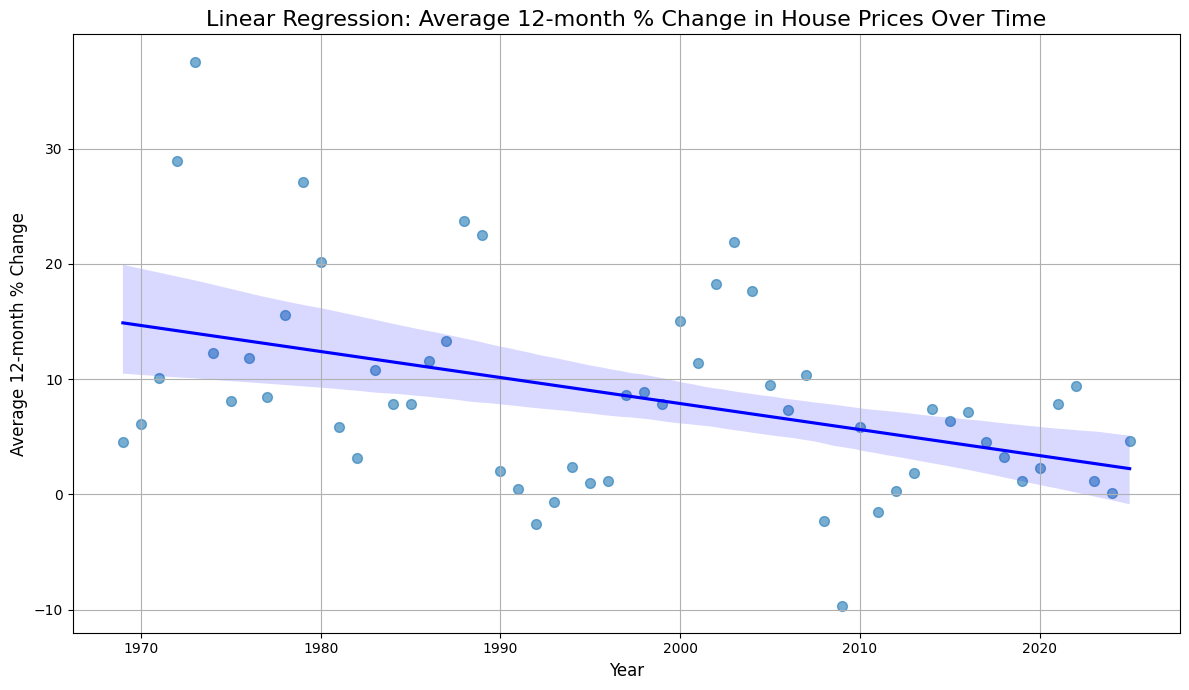

In [81]:
print('--- Visualizing Linear Regression Model 2: Temporal Trend of 12-month % Change ---')

plt.figure(figsize=(12, 7))
sns.regplot(x=df_h2_prep_cleaned['Year'], y=df_h2_prep_cleaned['Average_12m%Change'],
            scatter_kws={'alpha': 0.6, 's': 50}, line_kws={'color': 'blue'})

plt.title('Linear Regression: Average 12-month % Change in House Prices Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average 12-month % Change', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

--- Visualizing Linear Regression Model 2: Temporal Trend of 12-month % Change ---


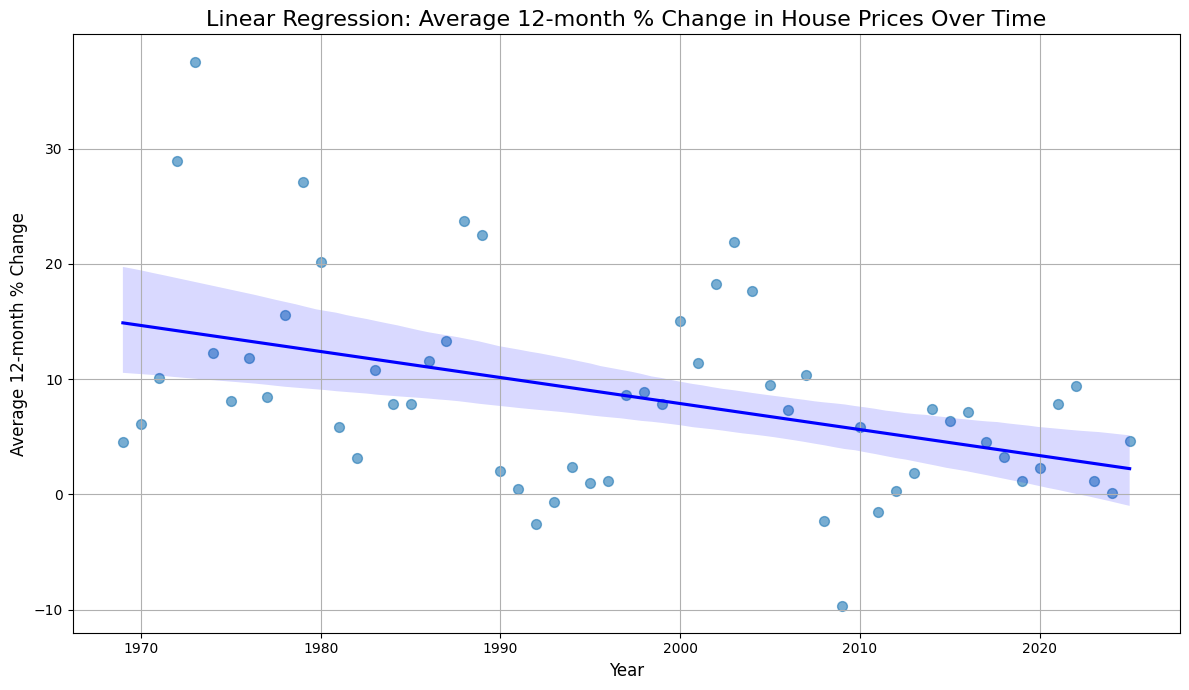

In [82]:
print('--- Visualizing Linear Regression Model 2: Temporal Trend of 12-month % Change ---')

plt.figure(figsize=(12, 7))
sns.regplot(x=df_h2_prep_cleaned['Year'], y=df_h2_prep_cleaned['Average_12m%Change'],
            scatter_kws={'alpha': 0.6, 's': 50}, line_kws={'color': 'blue'})

plt.title('Linear Regression: Average 12-month % Change in House Prices Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average 12-month % Change', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Findings:

1. Sales Volume and Future Price Change:
There is a statistically significant but extremely small negative relationship between lagged sales volume (SalesVolume_Lagged) and the next period’s average price change (AveragePrice_NextPeriod_Change). The slope is almost zero (-0.000001592), and the R-squared is 0.000, meaning sales volume barely explains any changes in future prices. So, while the result is statistically significant, it’s not practically useful for predicting price changes.

2. Trend in Annual Price Growth:
There is a clear downward trend in the average 12-month price change (Average_12m%Change) over the years. The coefficient for Year is -0.2246 (p = 0.001), meaning that, on average, the annual growth rate decreases by about 0.22 percentage points each year. The R-squared is 0.196, so the year explains around 20% of the variation in growth, suggesting other factors also play a role.

Practical Implications:

Lagged sales volume is not a useful predictor of future price changes. Other factors or different time lags probably drive price movements.

The housing market shows a slowing growth trend over time, which could reflect a maturing market or broader economic influences, but year alone doesn’t explain all the changes—many other factors matter.

## Critical evaluation of visualizations for bias and sisleading conclusions

1. Average Price Over Time:
The y-axis starts at zero, which is good, but using absolute values can make early price changes look smaller than they really were. Showing only the overall UK average hides regional differences and masks trends for different property types.

2. Top/Bottom 10 Regions by Average Price:
Focusing on the extremes creates selection bias, exaggerating the perceived differences. The plots show absolute prices without context on affordability or growth rates, and the color choices might make regions seem more different than they really are.

3. Top/Bottom 10 Regions by 12-Month % Change:
Highlighting only the top and bottom performers can be misleading. Different y-axis scales for each plot distort comparisons, and the long-term averages hide volatility or short-term trends. Small markets or low sales can exaggerate percentage changes.

4. Correlation Matrix:
Strong correlations don’t mean one factor causes another. Weak correlations, like between sales volume and prices, might hide more complex or delayed relationships. Aggregating data across regions and time periods can also mask local trends.

5. Distribution of 1-Month Sales Volume Change:
Extreme outliers dominate the plots, making typical variation harder to see. Scaling to include outliers compresses the main data and can minimize perceived differences. Even if statistical tests show a difference, visually it may look small, so practical significance could be over- or under-estimated.